# Tarea - Programación lineal

### Diseño de la Dieta Óptima

Se quiere producir comida para gatos de la manera más barata, no obstante se debe también asegurar que se cumplan los datos requeridos de analisis nutricional. Por lo que se quiere variar la cantidad de cada ingrediente para cumplir con los estandares nutricionales. Los requisitos que se tienen es que en $100$ gramos, se deben tener **por lo menos** $8$ gramos de proteína y $6$ gramos de grasa. Así mismo, no se debe tener más de $2$ gramos de fibra y $0.4$ gramos de sal.  

Los datos nutricionales se pueden obtener de la siguiente tabla:

Ingrediente|Proteína|Grasa|Fibra|Sal
:----|----|----|----|----
Pollo|  10.0%|08.0%|00.1%|00.2%
Carne|  20.0%|10.0%|00.5%|00.5%
Cordero|15.0%|11.0%|00.5%|00.7%
Arroz|  00.0%|01.0%|10.0%|00.2%
Trigo|  04.0%|01.0%|15.0%|00.8%
Gel|    00.0%|00.0%|00.0%|00.0%

Los costos de cada producto son:

Ingrediente|Costo por gramo
:----|----
Pollo|$\$$0.013
Carne|$\$$0.008
Cordero|$\$$0.010
Arroz|$\$$0.002
Trigo|$\$$0.005
Gel|$\$$0.001    

Lo que se busca optimizar en este caso es la cantidad de productos que se debe utilizar en la comida de gato, minimizando el costo total. Para simplificar la notación use las siguientes variables: 

+ $x_1:$ Gramos de pollo  
+ $x_2:$ Gramos de carne  
+ $x_3:$ Gramos de cordero  
+ $x_4:$ Gramos de arroz  
+ $x_5:$ Gramos de trigo  
+ $x_6:$ Gramos de gel

La tarea consiste en plantear el problemade programación lineal que permita satisfacer las necesidades alimenticias del gato al tiempo que minimice el costo total y resolverlo con `linprog`.

### Planteamiento

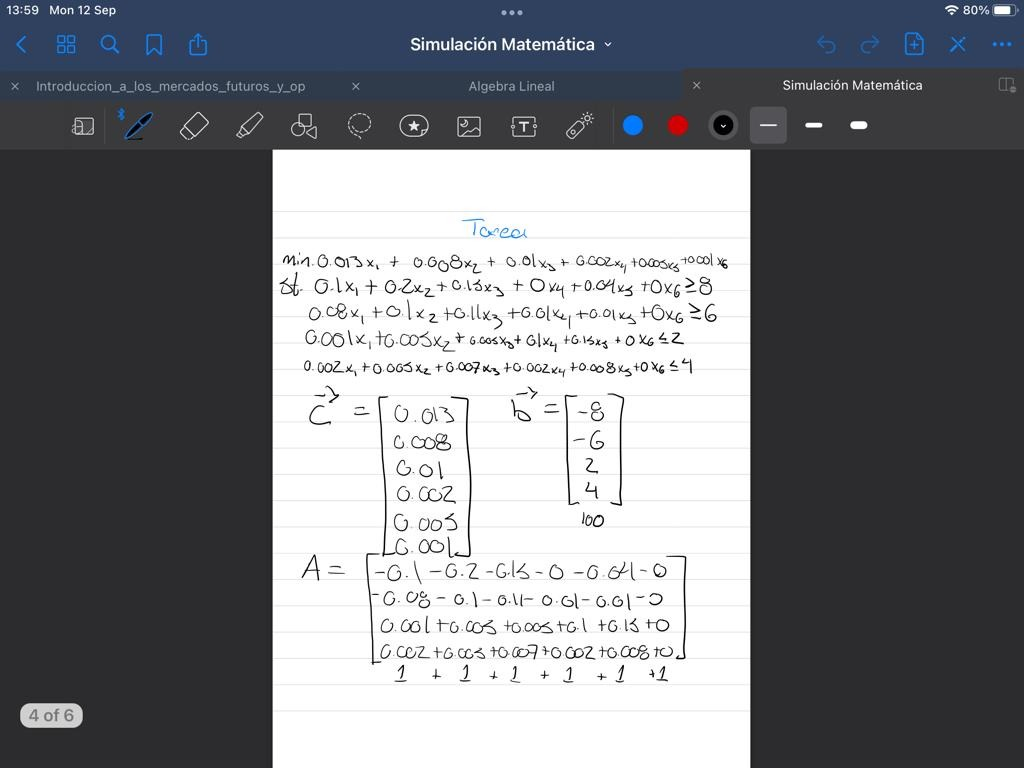

In [1]:
import numpy as np
import scipy.optimize as opt

opt.linprog?

In [3]:
c = np.array([0.013,
              0.008,
              0.01,
              0.002,
              0.005,
              0.001])
A = np.array([
    [-0.1,-0.2,-0.15,0,-0.04,0],
    [-0.08,-0.1,-0.11,-0.01,-0.01,0],
    [0.001,0.005,0.005,0.1,0.15,0],
    [0.002,0.005,0.007,0.002,0.008,0]
])
b = np.array([-8,-6,2,0.4])

A_eq = np.array([
    [1,1,1,1,1,1]
])
b_eq = np.array([100])

opt.linprog(c,A,b,A_eq,b_eq)

     con: array([3.05107051e-11])
     fun: 0.5200000000216561
 message: 'Optimization terminated successfully.'
     nit: 8
   slack: array([4.00000000e+00, 7.70468134e-11, 1.70000000e+00, 1.00000000e-01])
  status: 0
 success: True
       x: array([4.50819667e-10, 6.00000000e+01, 4.08653405e-09, 2.29072691e-08,
       3.70730010e-10, 4.00000000e+01])

### Problema de distribución de energía eléctrica

La Comisión Federal de Electricidad **(CFE)** dispone de tres plantas de generación para satisfacer la demanda diaria eléctrica en tres ciudades, Guadalajara, León y Morelia. Las plantas $1$, $2$ y $3$ pueden satisfacer $80$, $40$ y $60$ millones de KW al día respectivamente. Las necesidades de las ciudades de Guadalajara, León y Morelia son de $70$, $40$ y $70$ millones de Kw al día respectivamente. 


Los costos asociados al envío de suministro energético por cada millón de Kw entre cada planta y cada ciudad son los registrados en la siguiente tabla. 

-|Guadalajara|León|Morelia
:----|----|----|----
Planta 1|5|2|7
Planta 2|3|6|6
Planta 3|6|1|2

Y por último, las restricciones del problema, van a estar dadas por las capacidades de oferta y demanda de cada planta (en millones de KW) y cada ciudad.

Para simplificar la notación use las siguientes variables:

+ $x_1$: Kw (en millones) distribuidos de la Planta 1 a Guadalajara
+ $x_2$: Kw (en millones) distribuidos de la Planta 1 a León
+ $x_3$: Kw (en millones) distribuidos de la Planta 1 a Morelia
+ $x_4$: Kw (en millones) distribuidos de la Planta 2 a Guadalajara
+ $x_5$: Kw (en millones) distribuidos de la Planta 2 a León
+ $x_6$: Kw (en millones) distribuidos de la Planta 2 a Morelia
+ $x_7$: Kw (en millones) distribuidos de la Planta 3 a Guadalajara
+ $x_8$: Kw (en millones) distribuidos de la Planta 3 a León
+ $x_9$: Kw (en millones) distribuidos de la Planta 3 a Morelia

La tarea consiste en plantear el problema de programación lineal que permita satisfacer las necesidades de todas las ciudades al tiempo que minimice los costos asociados a la distribución y resolverlo con `linprog`.

### Planteamiento

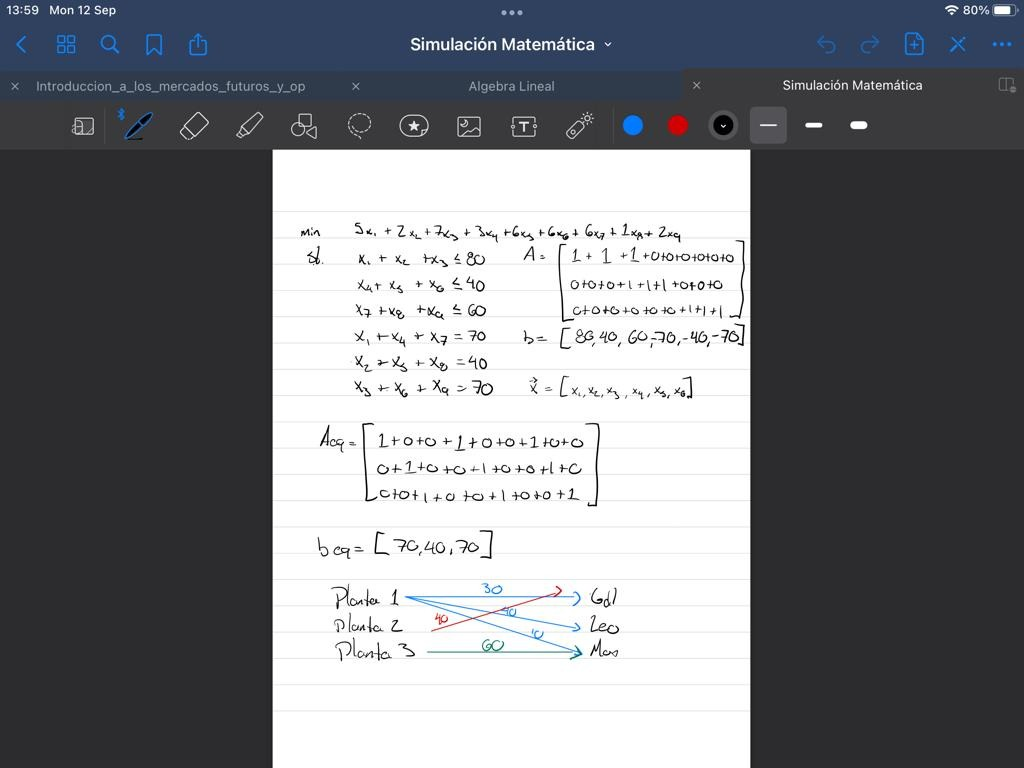

In [9]:
import numpy as np
import scipy.optimize as opt



In [10]:
c = np.array([5,2,7,3,6,6,6,1,2])
A = np.array([
    [1,1,1,0,0,0,0,0,0],[0,0,0,1,1,1,0,0,0],[0,0,0,0,0,0,1,1,1]
])
b = np.array([80,40,60])

A_eq = np.array([
    [1,0,0,1,0,0,1,0,0],
    [0,1,0,0,1,0,0,1,0],
    [0,0,1,0,0,1,0,0,1]
])
b_eq = ([70,40,70])
opt.linprog(c,A,b,A_eq,b_eq)


/var/folders/zc/nh109mkj6pld9slq4vyqbcnm0000gn/T/ipykernel_719/2669640854.py:13: OptimizeWarning: Solving system with option 'cholesky':True failed. It is normal for this to happen occasionally, especially as the solution is approached. However, if you see this frequently, consider setting option 'cholesky' to False.
  opt.linprog(c,A,b,A_eq,b_eq)
/var/folders/zc/nh109mkj6pld9slq4vyqbcnm0000gn/T/ipykernel_719/2669640854.py:13: OptimizeWarning: Solving system with option 'sym_pos':True failed. It is normal for this to happen occasionally, especially as the solution is approached. However, if you see this frequently, consider setting option 'sym_pos' to False.
  opt.linprog(c,A,b,A_eq,b_eq)


     con: array([1.83339921e-09, 1.01142916e-09, 1.83554505e-09])
     fun: 539.9999999871072
 message: 'Optimization terminated successfully.'
     nit: 6
   slack: array([2.10690132e-09, 1.01807274e-09, 1.55539936e-09])
  status: 0
 success: True
       x: array([3.00000000e+01, 4.00000000e+01, 1.00000000e+01, 4.00000000e+01,
       1.09701920e-10, 2.70241154e-11, 5.71145230e-11, 7.62290809e-11,
       6.00000000e+01])

### Planta 1:
Distribuye: 
- 30 millones de Kw a Guadalajara.
- 40 millones de Kw a León.
- 10 millones de Kw a MOrelia.
**Total: 80 millones de Kw (Capacidad máxima).**

### Planta 2:
Distribuye:
- 40 millones de Kw a Guadalajara.
**Total: 40 millones de Kw (Capacidad máxima).**

### Planta 3:
Distribuye:
- 60 millones de Kw a Morelia.
**Total: 60 millones de Kw (Capacidad máxima).**

### Guadalajara:
Recibe:
- 30 millones de Kw de la planta 1.
- 40 millones de Kw de la planta 2.
**Total recibido: 70 millones de Kw (Satisfecha).**

### León
Recibe:
- 40 millones de la planta 1.
**Total recibido: 40 millones de Kw (Satisfecha).**

### Morelia
Recibe:
- 60 millones de Kw de la planta 3.
**Total recibido: 60 millones de Kw (Satisfecha).**